## The task of this analysis is to analyse various factors affecting a customer's decision perhaps even make informed recommendations from the results of the investigation. The dataset i will be using is that of an online e-commerce website. i will using bi variate and uni variate techniques to uncover insights in the data


In [1]:
#import all the necessary libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt





In [2]:
df = pd.read_csv('/Users/admin/Documents/data sci/database/online_shoppers_intention.csv')

In [3]:
#lets peek at the data 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#lets check for null values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.    
    

In [ ]:
#nice... the data shows that there are no missing values. 

In [ ]:
## univariate analysis. Lets start by looking at the following features in some more detail:
• Revenue column
• Visitor type
• Traffic type
• Region
• Weekend-wise distribution
• Browser and operating system
• Administrative page
• Information page
• Special day


## lets take a look at the baseline conversion rate from the revenue column
This feature simply refers to how many of the online shopping sessions ended in a purchase.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


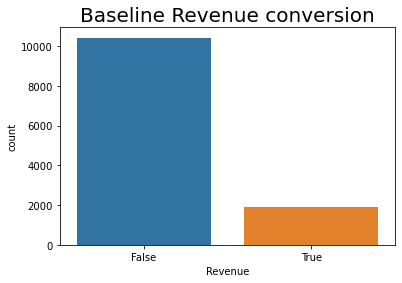

In [12]:
sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

from the preceding graph it is very clear there is a higher percentage of false count than true
lets use the value_count() fuction to get the actual values. 

In [13]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True)) 

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [ ]:
What do the results tell us? 

a total of 1,908 customers ended up making a purchase, while 10,422 customers did not.

The baseline conversion rate of online visitors versus overall visitors is a ratio
between the total number of online sessions that led to a purchase divided by the
total number of sessions. 

This is calculated as follows:
1908/12330 * 100 = 15.47%

The overall number of visitors is 12,330, Thus, the conversion rate is 15.47%

## visitor wise distribution
the next task is to analyse the visitor wide distribution, determine which percentages of the category of 
visitors is higher.


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


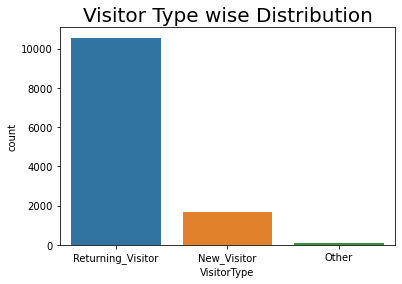

In [14]:
sns.countplot(df['VisitorType'])
plt.title('Visitor Type wise Distribution', fontsize = 20)
plt.show()

In [15]:
#Next, we calculate the exact number of visitors belonging to each type:
 
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


In [ ]:
from the graph and value count it is clear that the number of returning visitors outweigh the no of new visitors 
and others. This is good news because this shows that we are good at attracting visitors back to our site.

## Traffic type distrtibution

In [ ]:
Let's consider the distribution of traffic. 

Find out how the visitors visit our page to determine what amount of site traffic is accounted 
for by direct visitors (meaning they enter the URL into the browser) and how much is generated 
through other mediums, such as blogs or advertisements.

Plot a countplot for the traffic type to visulize this:


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


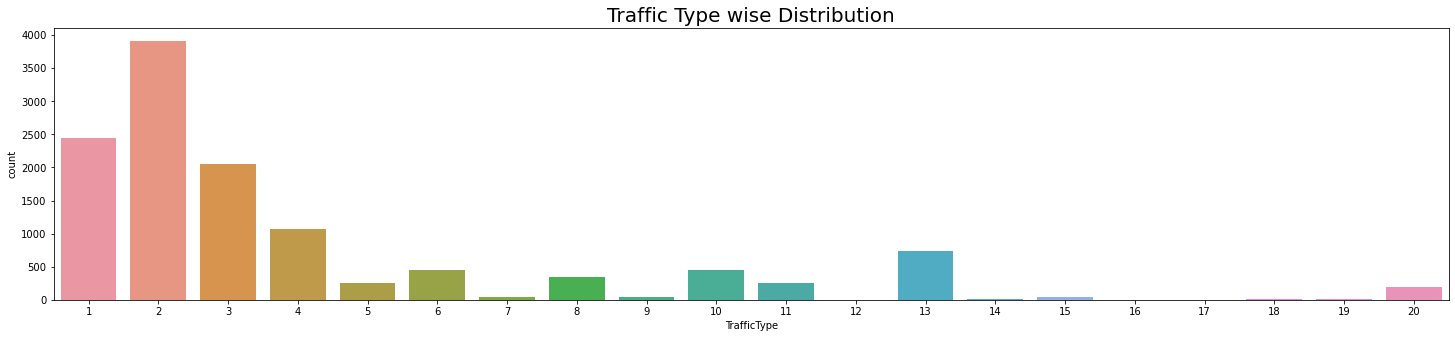

In [16]:
plt.figure(figsize = (25,5))
sns.countplot(df['TrafficType'])
plt.title('Traffic Type wise Distribution', fontsize = 20)
plt.show()

In [ ]:
it is clear from the graph above that traffic type 2 has the highest count. lets use the value_count() to get
the actual values

In [17]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


In [ ]:
From the preceding information, we can see that sources 2, 1, 3, and 4 account for
the majority of our web traffic.
In the following section, we will check the weekend distribution of the customer

Analyzing the Distribution of Customers Session on the Website

let's consider the distribution of customers over days of the week
to determine whether customers are more active on weekends or weekdays

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


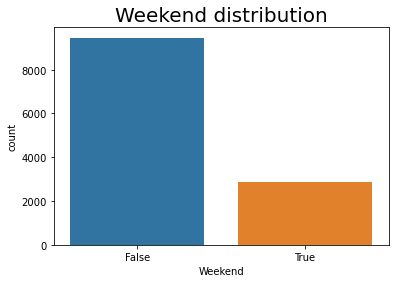

In [18]:
sns.countplot(df['Weekend'])
plt.title('Weekend distribution', fontsize = 20)
plt.show()

In [19]:
#Now, look at the count of each subcategory in the weekend column:
    
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))
 

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


In [ ]:
From the count of the False subcategory, we can see that more visitors visit during
weekdays than weekend days.

In [ ]:
#Next, we look at the region-wise distribution of the sessions. 

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


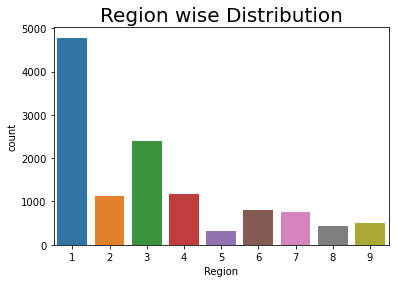

In [20]:
sns.countplot(df['Region'])
plt.title('Region wise Distribution', fontsize = 20)
plt.show()

In [21]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


In [ ]:
From the preceding graph, the numbers 1, 2, and so on represent the different
regions that the data is sourced from. 
We can see that Region 1 has the highest number of visitors visiting our website.

## we will be checking the distribution of browsers and operating systems used by customers to determine which type of browser and OS is used by our visitors. 
This information will allow us to configure our website so that we can make it more responsive and user-friendly.



/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


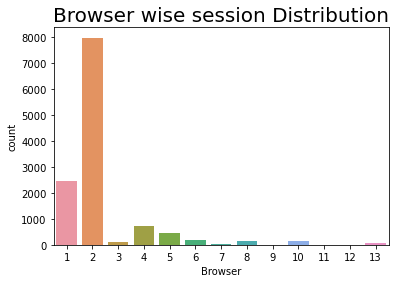

In [22]:
sns.countplot(df['Browser'])
plt.title('Browser wise session Distribution', fontsize = 20)
plt.show()


In [24]:
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


In [ ]:
#it is clear from the graph and the value count that no 2 is the most used browser perhaps we need to work on 
optimisation for other browsers.

In [26]:
# analysing operating system distribution


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


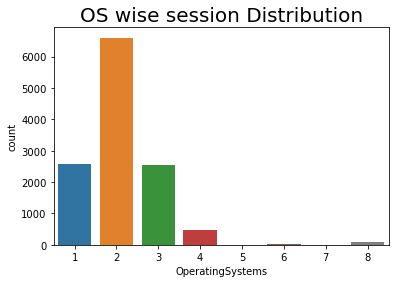

In [27]:
sns.countplot(df['OperatingSystems'])
plt.title('OS wise session Distribution', fontsize = 20)
plt.show()

In [28]:
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


In [ ]:
#it is very clear which operating system contributes the most to website traffic
if we know which OS type is the most predominant, we can ask the tech team to configure the website for that
particular OS and take the necessary actions, such as explicitly defining CSS for that
particular OS and defining valid doctypes.

### Information Pageview Distribution

In [ ]:
The information pages of a site are the pages where the direct information is presented. 
The simple web pages that do not generate leads or that are not connected to lead-generating pages 
can be classified as information pages. 

For example, contact pages that simply display contact information could be considered as information pages.
 
Now, let's plot the count of visitors visiting the information page.

The output will be as follows:

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


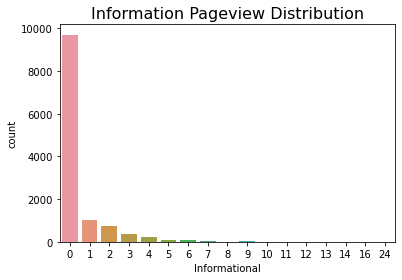

In [30]:
# Plot the countplot for the Informational page:
sns.countplot(df['Informational'])
plt.title('Information Pageview Distribution', fontsize = 16)
plt.show()

In [31]:
# To get the percentage count for each information page, we use the normalize=True parameter.
print(df['Informational'].value_counts(normalize=True))

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


In [ ]:
'''From the preceding graph, we can see that Information page 0 has the highest
number of visitors. 79% of users are visiting pages 0 and 1. 

In [ ]:
### Special Day Session Distribution

In this section, we will be looking at the number of visitors during a special day. 
We would like to know whether special days (such as Valentine's Day) impact the number
of users visiting our website.
                                            
Let's plot the countplot for special days:
The output will be as follows:

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


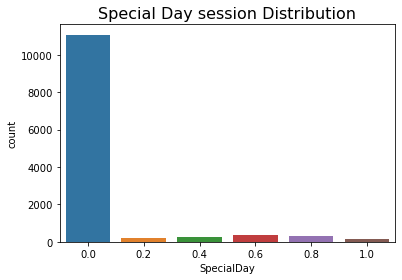

In [32]:
sns.countplot(df['SpecialDay'])
plt.title('Special Day session Distribution', fontsize = 16)
plt.show() 

In [33]:
print(df['SpecialDay'].value_counts(normalize=True))

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


In [ ]:
'''From the plot above, we can see that special days have no impact on the number of visitors to our website.

From the preceding screenshot, we can see that 89.8% of visitors visited during a
non-special day (special day subcategory 0), showing that there is no affinity of web
traffic toward special days.'''

In [ ]:

Our univariate analysis of distribution plots covered such factors such as region,
month, type of browser... 

What insights and recommendation have we uncovered so far?

- we are good at retaining customers
- we need to work on more strategies to generate revenue by customer purchase
- customers seem to visit the sites during the weekdays most likely when they are at work.
- special days have no effect on website traffic, maybe we need to work on special packages for special 
ocassion to drive more traffic during special holidays.
- customers use a particular OS, we need to optimize the website to better suit the os and others as well.
- we have more customers from a particular region, perhaps we could organize special offers for customers from that 
region and look at more strategies to bring in more customers from other regions as well.

In [ ]:
'''lets do a bivariate analysis to see how most of these features affect the revenue'''

## Bivariate analysis

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


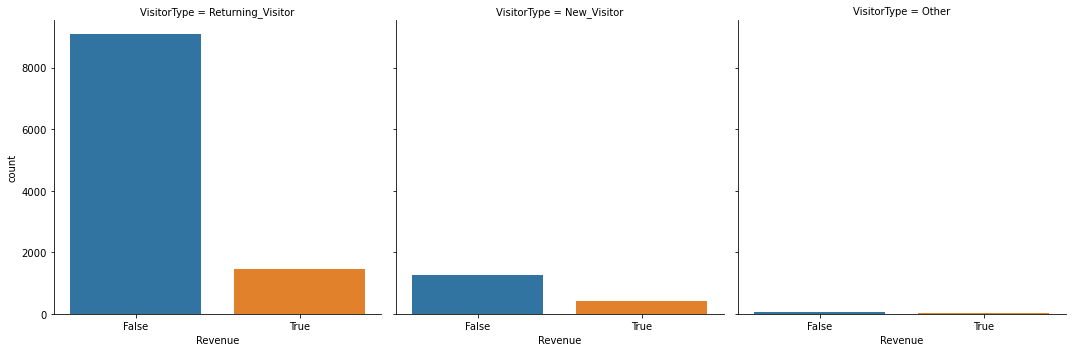

In [35]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3, data=df,kind="count", height=5, aspect=1)
plt.show()

## from the graph it is clear that the returning visitor generates more revenue than new visitor and other. however it also shows that the rate of conversion to sales of new visitors is higher than the returning visitor

## revenue versus traffic type
We will be plotting a countplot between revenue and traffic type. The countplot
gives you the number of users in each traffic type, and whether or not they made a
purchase (shown as True or False in the plot):

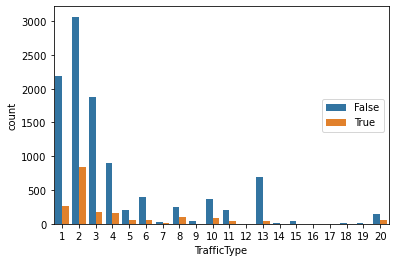

In [37]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

### from the plot it is very clear that source 2 with the highest traffic type generated the most revenue. source 1 and source 13 generates a lot of traffic but the conversion rate are very low compared to others.


In [38]:
#lets plot for region against revenue

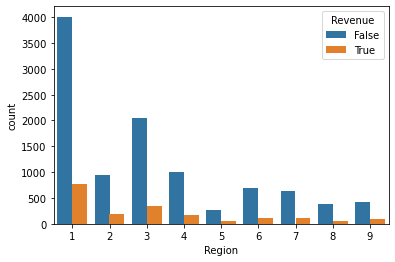

In [39]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

In [ ]:
From the plot, we can see that region 1 accounts for most sales, and
region 3 the second most. 

With this information, we can plan our marketing and supply chain activities in a better way. 

For example, we might propose building a warehouse specifically catering to the needs of region 1 to increase delivery
rates and ensure that products in the highest demand are always well stocked. 

In [ ]:
lets consider the relationship between Browser and revenue

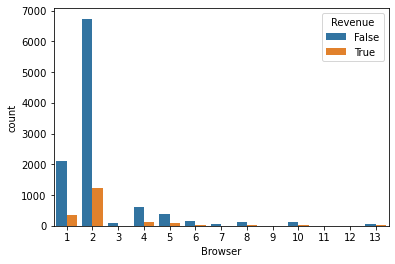

In [40]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

In [ ]:
As you can see, more revenue-generating transactions have been performed from Browser 2. 
Even though Browser 1 creates a considerable number of sessions, the conversion rate is low. 

This is something we need to investigate further.
Consider the relationship between Revenue and the OperatingSystems type. 

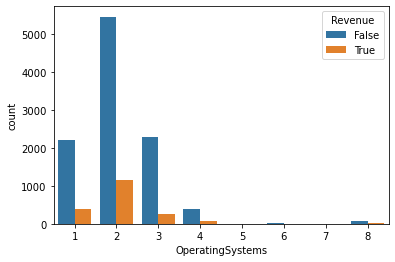

In [41]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

In [ ]:
As you can see, more revenue-generating transactions happened with OS 2 than the other types.
Now consider the relationship between Revenue (did the session end with a purchase?) and Months.

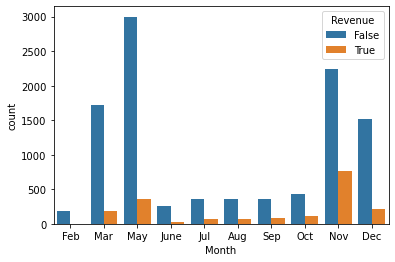

In [42]:
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [ ]:
from the preceding graph it is interesting to observe that the the website recorded a lot of visitors in may 
however the bulk of the sales were made in november. interesting...

In [ ]:
In this section, we will be studying the linear relationship between the following variables:
• Bounce rate versus exit rate
• Page value versus bounce rate
• Page value versus exit rate
• Impact of information page views and information pageview duration on revenue

In [ ]:
## BounceRates versus exit rates

The linear relationship between bounce rate versus exit rate can be studied by plotting an LM plot from seaborn.
We are setting the x axis as BounceRates, and the y axis as ExitRates. The data is taken from the df DataFrame:


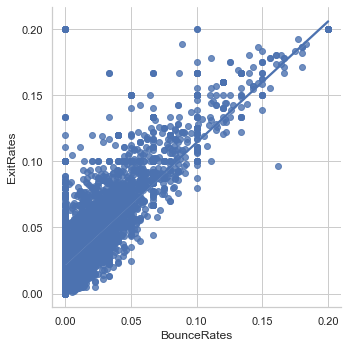

In [4]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

In [ ]:
from the chart above;
As you can see, there is a positive correlation between the bounce rate and the exit
rate. With the increase in bounce rate, the exit rate of the page increases.

## page value versus Bounce rate

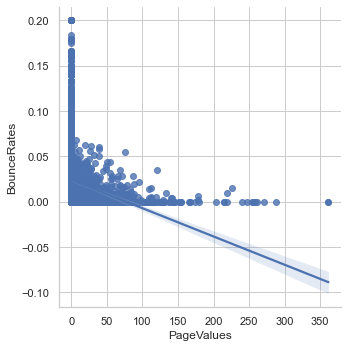

In [5]:
    
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)

As we can see in the plot, there is a negative correlation between page value and bounce rate. 

As the page value increases, the bounce rate decreases. 

To increase the probability of a customer purchasing with us, we need to improve the
page value—perhaps by making the content more engaging or by using images to convey the information. 

## page value versus exit rate

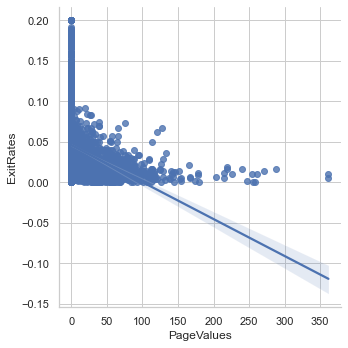

In [6]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

In [ ]:
As we can see in the preceding plot, there is a negative correlation between page
value and exit rate. Web pages with a better page value have a lower exit rate.

### Impact of Information Page Views and Information Pageview Duration on Revenue

In [ ]:
n this section, we want to look at the relationship between the number of views of the information 
pages and the amount of time spent on them. Does this relationship have an impact on revenue? If so, how?

To study the relationship, draw the LM plot with the x axis as Informational and
the y axis as Informational_Duration, and with the hue parameter as Revenue:

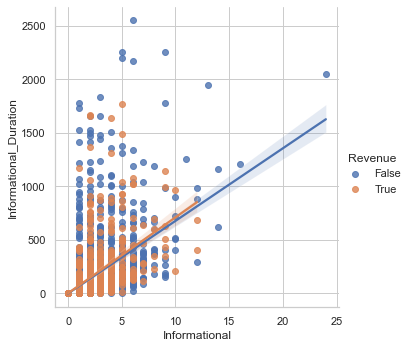

In [7]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df)

In [ ]:
From the preceding plot, we can conclude the following:
    
• Information page views and information pageview duration are positively correlated. 
With an increase in the number of information pageviews, the information pageview duration also increases.
• Customers who have made online purchases visited fewer numbers of informational pages. 
This implies that informational pageviews don't have much effect on revenue generation.

## Summary

In [ ]:
i focused on the online shopping dataset, wherein i tried to draw insights from a customer's 
behavior on the site. 

i analyzed a number of factors, such as conversion rate and total revenue generated.

i also performed univariate and bivariate analysis while taking various dataset features into consideration, 
such as pageview duration, types of visitors, types of traffic, and browsers used. 

i was able to generate informative insights and provide recommendations that would increase sales on the website